##Predicting Pistachio type using Machine Learning

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
# import data set
pistachio_df = pd.read_csv('pistachio.csv')
# data overview
pistachio_df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [3]:
# Check how many types of pistachio species there are
pistachio_df['Class'].unique()

array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)

Only 2 pistachio species exist in this data set. This will make is easy to convert the text to a numerical code which can be used to create a predictive model later on.

In [4]:
# check for missing values
pistachio_df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

There are no missing values in this data set.

In [5]:
# check the summary statistics of the data
pistachio_df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


In [6]:
# check the number of rows and columns
pistachio_df.shape

(1718, 17)

In [28]:
# check data type in columns
pistachio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
 17  Class Label    1718 non-null   int64  
dtypes: float

In [27]:
# see distribution of pistachio types
pistachio_df['Class'].value_counts()

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64

In [24]:
# ratio of pistachio types
pistachio_ratio = pistachio_df['Class'].value_counts('Kirmizi_Pistachio')
print(pistachio_ratio)


Kirmizi_Pistachio    0.580908
Siit_Pistachio       0.419092
Name: Class, dtype: float64


In [25]:
# Create labels for the target variable (Class)
# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the Class column
# New column created
pistachio_df['Class Label'] = le.fit_transform(pistachio_df['Class'])
pistachio_df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class,Class Label
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio,0
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio,1
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio,0
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio,0
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio,0


Kirmizi_Pistachio is 0 and Siit_Pistachio is 1

In [26]:
# check the number of rows and columns after adding new column, Class label
pistachio_df.shape

(1718, 18)

Split the data into features(X) and target(y) variables to make modelling possible.

In [29]:
# Split the data into X and y
# Select all features
X = pistachio_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values.reshape(-1,16)

# Select target column
y = pistachio_df.iloc[:,-1].values


X_new = preprocessing.scale(X) #scale the data so that it is easier to fit

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_new,
                y, test_size=0.25, random_state=0)

# Look at first 5 rows of features
X[0:5]

array([[7.3107000e+04, 1.1618070e+03, 4.4240740e+02, 2.1772610e+02,
        8.7050000e-01, 3.0509460e+02, 9.4240000e-01, 7.7579000e+04,
        7.7100000e-01, 2.0319000e+00, 6.8060000e-01, 6.8960000e-01,
        6.1000000e-03, 3.0000000e-03, 4.7560000e-01, 9.6640000e-01],
       [8.9272000e+04, 1.1731810e+03, 4.6025510e+02, 2.5195460e+02,
        8.3690000e-01, 3.3714190e+02, 9.6410000e-01, 9.2598000e+04,
        7.5840000e-01, 1.8267000e+00, 8.1510000e-01, 7.3250000e-01,
        5.2000000e-03, 2.8000000e-03, 5.3660000e-01, 9.8020000e-01],
       [6.0955000e+04, 9.9978900e+02, 3.8692470e+02, 2.0912550e+02,
        8.4140000e-01, 2.7858630e+02, 9.4650000e-01, 6.4400000e+04,
        7.2630000e-01, 1.8502000e+00, 7.6630000e-01, 7.2000000e-01,
        6.3000000e-03, 3.4000000e-03, 5.1840000e-01, 9.5910000e-01],
       [7.9537000e+04, 1.4395129e+03, 4.6679730e+02, 2.2121360e+02,
        8.8060000e-01, 3.1822890e+02, 9.4370000e-01, 8.4281000e+04,
        7.5680000e-01, 2.1102000e+00, 4.82300

## **Model Creation**

Time to create a model. A logistic regression model will be used.

In [30]:
# create a logistic regression model

log_reg = LogisticRegression()

# fit the model with the training data
log_reg.fit(X_train, y_train)

# predict y
y_pred = log_reg.predict(X_test)

In [31]:
# Import library
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
headings = list(['Kirmizi_Pistachio', 'Siit_Pistachio'])
conf_mat = confusion_matrix(y_test, y_pred)

# Display matrix as a table
cm_df = pd.DataFrame(conf_mat, columns=headings, index=headings)
cm_df


,Kirmizi_Pistachio,Siit_Pistachio
Kirmizi_Pistachio,224,25
Siit_Pistachio,36,145


36 pistachios were incorrectly labelled as Siit Pistachios and 25 were incorrectly labelled as Kirmizi Pistachio's by the model.

**Measure the model's performance by calculating the accuracy score.**

In [32]:
# model's accuracy, rounded to 2 decimals
model_score = log_reg.score(X_test, y_test)
print(f'Model Accuracy: {round(model_score,2)}')

Model Accuracy: 0.86


In [33]:
# Using built in accuracy function, rounded to 2 decimals
round(accuracy_score(y_pred, y_test),2)

0.86

Create a heat map using correlation to get an idea of how the different features(variables) are related.

<ipython-input-34-241d94c84668>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(pistachio_df.drop('Class Label', axis=1).corr(), annot=True)


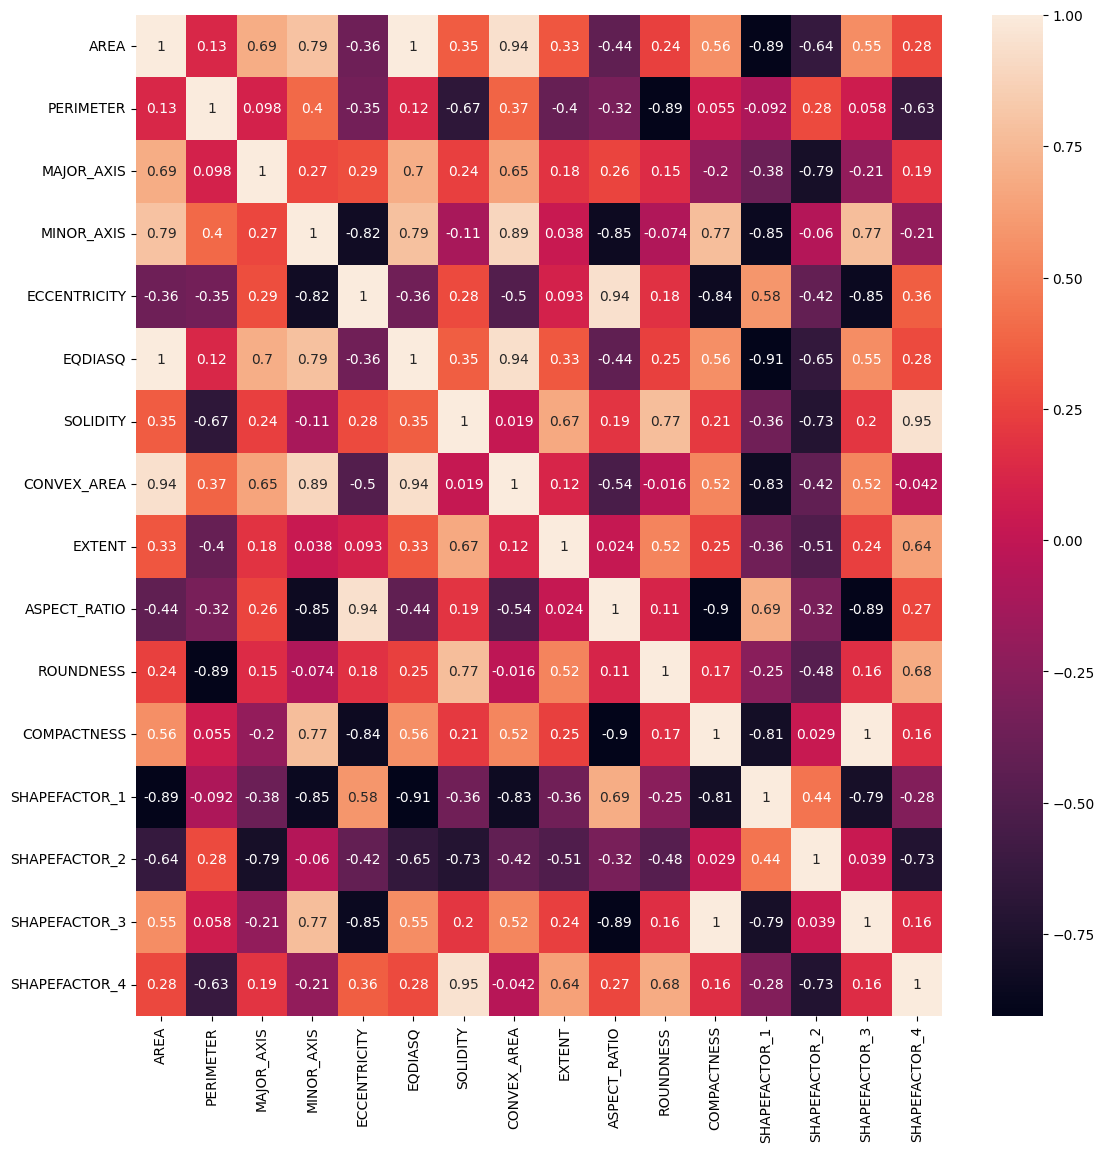

In [34]:
# Size your plot
plt.figure(figsize=(13,13))

# Create a heat map
ax = sns.heatmap(pistachio_df.drop('Class Label', axis=1).corr(), annot=True)

plt.show()

The following pairs had strong correlation of 0.9 or higher (either positive or negative).
*   EQDIASQ, AREA
*   CONVEX_AREA, AREA
*   ASPECT_RATIO, ECCENTRICITY
*   SHAPEFACTOR_4, SOLIDITY
*   SHAPEFACTOR_3, COMPACTNESS
*   ASPET_RATIO, COMPACTNESS
*   SHAPEFACTOR_1, EQDIASQ
*   EQDIASQ, CONVEX_AREA








##Using Principal Component Analysis (PCA) to reduce dimensionality
**Option 1**

In [35]:
# Import library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# choose number of components to be generated
nr_comps = 5
pca = PCA(n_components=nr_comps)
# Scale X using Standard Scaler
X_pca = StandardScaler().fit_transform(X)
# obtain components
principal_components = pca.fit_transform(X_pca)


# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=pistachio_df.index)

# look at the data frame
pca_df.head()


,0,1,2,3,4
0,1.417165,-1.241668,0.467468,-0.173413,0.908023
1,-1.841466,-1.404646,0.307516,0.449374,0.474864
2,2.328898,0.159566,3.090275,0.297681,0.251376
3,0.885710,-1.354179,-1.093780,-0.804575,0.320594
4,-1.216448,-2.195653,-2.680591,0.518954,0.582621


In [37]:
# verify number of components
pca.n_components_

5

In [38]:
#variance distribution in components
pca.explained_variance_ratio_

array([0.44811063, 0.30754994, 0.1621144 , 0.04122837, 0.02697606])

Recuding dimensions means some data will be lost.
The 5 features selected  account for 98.6% of the variance which means that only 1.4% of the variance was lost. The first two features account for 44.8% and 30.8% of the variance respectively.

**Option 2**

In [39]:
# Using 95% of the variance to determine the number of components
# Scale X using Standard Scaler
X_pca_1 = StandardScaler().fit_transform(X)
pca_1 = PCA(.95)

# obtain components
principal_components = pca_1.fit_transform(X_pca_1)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=pistachio_df.index)

# look at the data frame
pca_df.head()

,0,1,2,3
0,1.417165,-1.241668,0.467468,-0.173413
1,-1.841466,-1.404646,0.307516,0.449374
2,2.328898,0.159566,3.090275,0.297681
3,0.885710,-1.354179,-1.093780,-0.804575
4,-1.216448,-2.195653,-2.680591,0.518954


In [40]:
# Check how many components were used
pca_1.n_components_

4

Keeping PCA at 95% of the variance returns 4 features as the most influential features needed to determine the target, as opposed to using 16 of the original features. This reduces the model computing time.

Create a Logistic Regression model using the 4 reduced features.

In [41]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca_1,
                y, test_size=0.25, random_state=1)
# instantiate a model
log_reg_pca = LogisticRegression()

# fit the model
log_reg_pca.fit(X_train, y_train )

#predict y
y_pred_pca = log_reg_pca.predict(X_test)

In [42]:
# check model accuracy rounded to 2 decimals
round(accuracy_score(y_pred_pca, y_test),2)

0.85

After reducing the dimension(features) to 4 from 16, the model accuracy only reduced by 1% from 86% to 85%.

##Compariming Models
**1. Decision Tree**

In [43]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [44]:
# Create model
tree = DecisionTreeClassifier(max_depth=5, random_state=2)

# fit the model
tree.fit(X_train,y_train)

# predict y
y_pred_tree = tree.predict(X_test)

In [45]:
# model accuracy rounded to 2 decimals
round(accuracy_score(y_pred_tree, y_test),2)

0.87

**2. Random Forest**

In [46]:
# create model
forest = RandomForestClassifier(n_estimators=100, random_state=2)

# fit the model
forest.fit(X_train, y_train)

# predict y
y_pred_forest = forest.predict(X_test)

In [47]:
# model accuracy
round(accuracy_score(y_pred_forest, y_test),2)

0.87

Comparing the 3 models. Logistic regression had an accuracy score of 86% and Decision tree and Random Forest both had an accuracy score of 87%.